In [129]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../..')
from funcs.stats import get_stats
from funcs.xarray_tools import find_cor_ts
from funcs.plotting import map_grid_clean
from constants.colors import loc_colors

from taus import decorrelation_temporal_model

In [45]:
# fps = list(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar').glob('*_tau.nc'))
fps = list(Path('/bsuhome/zacharykeskinen/scratch/coherence/uavsar').glob('*_tau.nc'))
dss = {fp.stem.replace('_v2',''): xr.open_dataset(fp).sel(pol = 'VV') for fp in fps}
df = pd.read_csv(Path('/bsuhome/zacharykeskinen/uavsar-coherence/data/snotel').joinpath('snotel_uavsar_diffs.csv'))

fig_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/snow/')

In [120]:
snotel_list = pd.read_csv('~/uavsar-coherence/data/snotel/snotel-list.csv', index_col=['State', 'ID'])
snotel_list.index = snotel_list.index.set_levels(snotel_list.index.levels[1].str.replace('\t', ''), level=1)
state_abbr = {'Colorado':'CO', 'Idaho': 'ID', 'California':'CA', 'New Mexico': 'NM', 'Utah': 'UT', 'Montana': 'MT'}
state_abbr = {v: k for k, v in state_abbr.items()}


In [121]:
for snotel_id in df.snotel.unique():
    sid, state, network = snotel_id.split(':')
    snotel_meta = snotel_list.loc[(state_abbr[state], sid)]
    lat, long = snotel_meta['Latitude'], snotel_meta['Longitude']

In [123]:
snotel_id = '814:UT:SNTL'
sid, state, network = snotel_id.split(':')
snotel_meta = snotel_list.loc[(state_abbr[state], sid)]
lat, long = snotel_meta['Latitude'], snotel_meta['Longitude']

In [128]:
dss['stlake_v3_tau'].sel(x = long, y = lat, method = 'nearest')['curvefit_coefficients'].isel(heading = 0).sel(param = 'gamma_inf').values

array(0.29551157)

In [135]:
df

,site,t1,t2,snotel,cor,days,temp_diff,swe_diff,sd_diff,swe_t1,swe_t2,sd_t1,sd_t2,temp_t1,temp_t2,inc,tree_perc,land_cover,n,dt_bins
0,alamos,2020-02-12 15:45:59+00:00,2020-02-26 16:27:08+00:00,1173:NM:SNTL,0.390891,14,-0.1,0.0051,-0.0508,0.1905,0.1956,0.7366,0.6858,-6.3,-6.4,1.279185,44.625000,42.0,16.0,"(10, 15]"
1,alamos,2020-02-12 15:45:59+00:00,2020-02-26 16:27:08+00:00,708:NM:SNTL,0.511272,14,-0.7,0.0076,-0.1270,0.1803,0.1880,0.7112,0.5842,-6.0,-6.7,0.847421,49.000000,42.0,12.0,"(10, 15]"
2,alamos,2020-02-12 15:46:01+00:00,2020-02-19 16:10:13+00:00,1173:NM:SNTL,0.328792,7,6.0,0.0025,-0.1016,0.1905,0.1930,0.7366,0.6350,-6.3,-0.3,1.279185,44.625000,42.0,16.0,"(5, 10]"
3,alamos,2020-02-12 15:46:01+00:00,2020-02-19 16:10:13+00:00,708:NM:SNTL,0.524462,7,6.2,0.0000,-0.1524,0.1803,0.1803,0.7112,0.5588,-6.0,0.2,0.847421,49.000000,42.0,12.0,"(5, 10]"
4,alamos,2020-02-19 16:10:25+00:00,2020-02-26 16:27:24+00:00,1173:NM:SNTL,0.331891,7,-6.1,0.0025,0.0508,0.1930,0.1956,0.6350,0.6858,-0.3,-6.4,1.279185,44.625000,42.0,16.0,"(5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,stlake,2021-03-16 20:39:07+00:00,2021-03-22 19:36:35+00:00,814:UT:SNTL,0.431109,5,-5.3,0.0356,0.1270,0.3632,0.3988,1.4732,1.6002,-1.2,-6.5,0.801499,51.916668,21.0,12.0,"(0, 5]"
436,stlake,2021-03-16 20:39:07+00:00,2021-03-22 19:36:35+00:00,366:UT:SNTL,0.339927,5,-5.8,0.0305,0.2032,0.3708,0.4013,1.0922,1.2954,-1.3,-7.1,0.970748,35.187500,41.0,16.0,"(0, 5]"
437,stlake,2021-03-16 20:39:07+00:00,2021-03-22 19:36:35+00:00,766:UT:SNTL,0.472272,5,-5.6,0.0483,0.2540,0.6731,0.7214,1.8542,2.1082,-0.9,-6.5,0.978418,13.333333,42.0,12.0,"(0, 5]"
438,uticam,2021-01-15 19:10:57+00:00,2021-01-20 20:41:01+00:00,919:MT:SNTL,0.510402,5,-6.2,0.0152,0.1270,0.1118,0.1270,0.4318,0.5588,-2.8,-9.0,0.878572,51.049999,42.0,20.0,"(0, 5]"


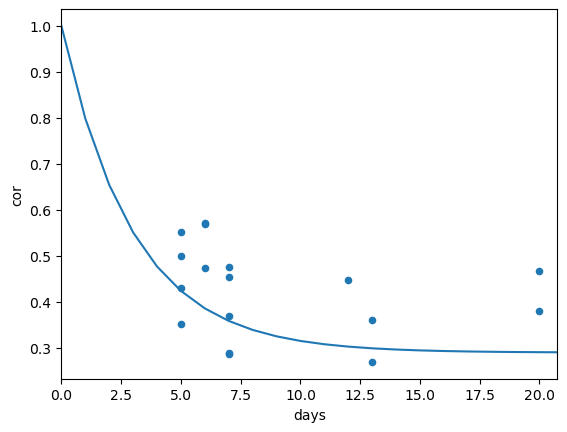

In [134]:
df[df.snotel == '814:UT:SNTL'].plot.scatter(x = 'days', y = 'cor')
plt.xlim(left = 0)
xs = np.arange(25)
plt.plot(xs, decorrelation_temporal_model(xs, 0.29, 3))

<Axes: xlabel='swe_diff', ylabel='cor'>

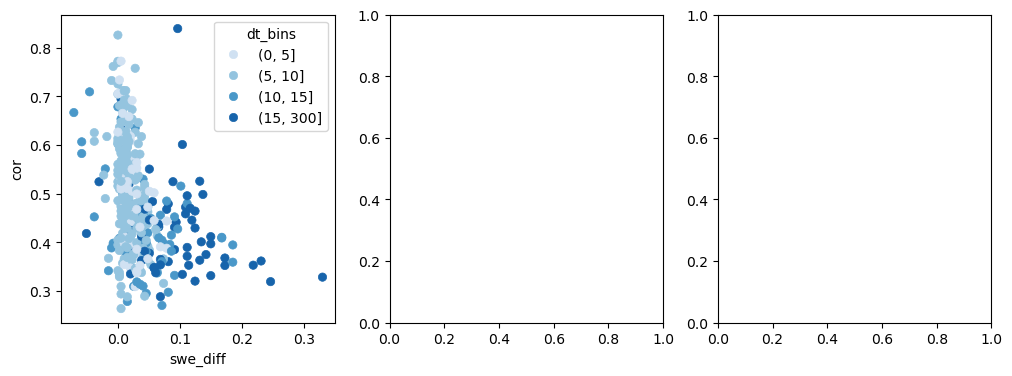

In [102]:
fig, axes= plt.subplots(1,3 , figsize = (12, 4))
# gs = axes[0, 1].get_gridspec()
# for ax in axes[1, :]: ax.remove()
# axbig = fig.add_subplot(gs[1, :])

# data = df[df.days < 8].copy()#.loc[df.snotel.isin((df[df.days < 8].value_counts('snotel') > 20).index)]

ax= axes[0]
df['dt_bins'] = pd.cut(df['days'], bins = [0, 5, 10, 15, 300])
sns.scatterplot(x='swe_diff', y='cor', hue = 'dt_bins', data=df, ec=None, legend=True, ax= ax, palette = 'Blues', zorder= 1e4)#, hue_norm=(0,30))
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df, hue = 'dt_bins', ax = axes[0])
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df, ax= axes[0], fill=False)
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df[df.days > 10], ax= axes[0], fill = False)
# sns.kdeplot(x = 'swe_diff', y = 'cor', data = df[df.days < 10], ax= axes[0], fill=False)

In [9]:
for stem, ds in dss.items():
    ds = ds.isel(x = slice(0, -1, 100), y = slice(0, -1, 100))
    for heading, t1, t2 in find_cor_ts(ds):
        sub = ds.sel(heading = heading, time1 = t1, time2 = t2)
        

KeyboardInterrupt: 